In [1]:
import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [2]:


day_start = 5  # Start day for averaging
day_end = 20    # End day for averaging
t1 = day_start * 24
t2 = day_end * 24

t1_3D = day_start * 8
t2_3D = day_end * 8

cases = [
    'SAM6108_RCE_MC_20221230_256x256',
    'SAM6108_RCE_MC_20221230_256x256a',
    'SAM6108_RCE_MC_20221230_256x256_DC',
    'SAM6108_RCE_MC_20221230_256x256_DCa'
]


#############################################################################################
######################### Data reading from 1D hourly files #################################
#############################################################################################

OLR_composites = []
SST_composites = []
SOLIN_composites = []
LHF_composites = []
SHF_composites = []

for case in cases:
    path = f'/fs3/group/mullegrp/Bidyut_Goswami/sam_data/{case}/OUT_{case}/NETCDF_files/'
    f_in = f'{path}RCE_MC_{case}.nc'
    fin = xr.open_dataset(f_in)

    LWd = fin['RADLWDN']
    LWu = fin['RADLWUP']
    OLR_z = LWu - LWd
    OLR = OLR_z[t1:t2].mean(dim='z')  # Domain mean

    SOLIN = fin['SOLIN'][t1:t2]
    SST = fin['SST'][t1:t2]
    LHF = fin['LHF'][t1:t2]
    SHF = fin['SHF'][t1:t2]

    # Reshape into (days, 24 hours) and compute the diurnal mean
    num_days = (t2 - t1) // 24
    OLR_composite = np.mean(OLR.values.reshape(num_days, 24), axis=0)
    SST_composite = np.mean(SST.values.reshape(num_days, 24), axis=0) - 273  # Convert to °C
    SOLIN_composite = np.mean(SOLIN.values.reshape(num_days, 24), axis=0)
    LHF_composite = np.mean(LHF.values.reshape(num_days, 24), axis=0)
    SHF_composite = np.mean(SHF.values.reshape(num_days, 24), axis=0)

#     # Apply Butterworth filter
#     b, a = scipy.signal.butter(3, 0.1)
#     OLR_composite_filtered = scipy.signal.filtfilt(b, a, OLR_composite)

    OLR_composites.append(OLR_composite)
    SST_composites.append(SST_composite)
    SOLIN_composites.append(SOLIN_composite)
    LHF_composites.append(LHF_composite)
    SHF_composites.append(SHF_composite)

# Convert lists to arrays for plotting
OLR_composites = np.array(OLR_composites)
SST_composites = np.array(SST_composites)
SOLIN_composites = np.array(SOLIN_composites)
LHF_composites = np.array(LHF_composites)
SHF_composites = np.array(SHF_composites)



# #############################################################################################
# ######################### Data reading from 3D 3- hourly files ##############################
# #############################################################################################

# QRAD_composites = []

# for case in cases:
#     path = f'/fs3/group/mullegrp/Bidyut_Goswami/sam_data/{case}/OUT_{case}/NETCDF_files/'
    
#     # Collect all files for this case
#     files = sorted(glob.glob(f'{path}RCE_MC_{case}_64_0000*.nc'))

#     # Open all files as a single dataset
#     ds = xr.open_mfdataset(files, combine='by_coords')

#     # Extract and compute domain mean QRAD (averaging over x, y, and z)
#     QRAD = ds['QRAD'][t1:t2].mean(dim=('x', 'y', 'z'))

#     # Reshape into (days, 8 time steps) and compute the diurnal mean
#     num_days_3D = (t2_3D - t1_3D) // 8
#     QRAD_composite = np.mean(QRAD.values.reshape(num_days_3D, 8), axis=0)

#     QRAD_composites.append(QRAD_composite)

# # Convert list to array for plotting
# QRAD_composites = np.array(QRAD_composites)





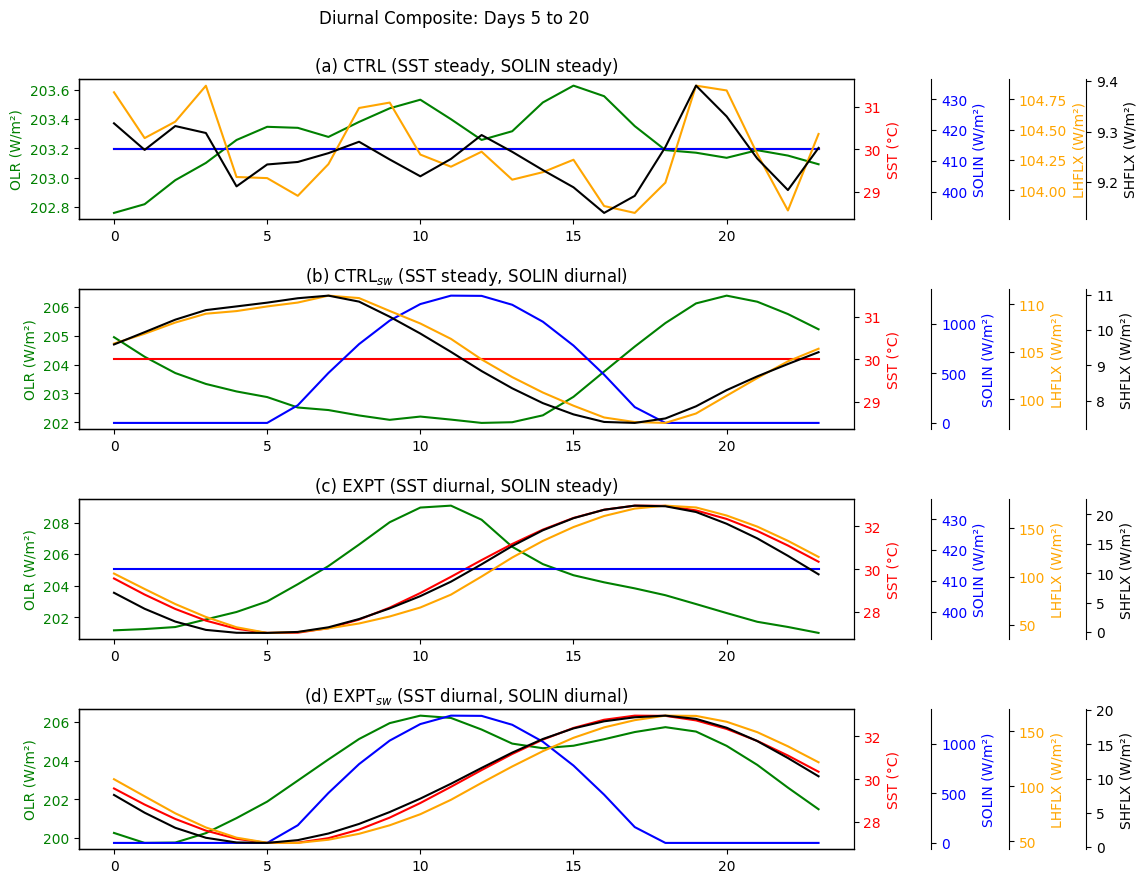

In [3]:
# Create diurnal time axis
time_diurnal = np.arange(0, 24, 24/np.shape(OLR_composites)[1])
# time_diurnal_adjust = np.arange(0, 24, 24/np.shape(QRAD_composites)[1])

# Plot results
fig, axes = plt.subplots(4, 1, figsize=(10, 10), gridspec_kw={'hspace': 0.5})
fig.suptitle(f'Diurnal Composite: Days {day_start} to {day_end}', y=0.95)

titles = [
    "(a) CTRL (SST steady, SOLIN steady)",
    "(b) CTRL$_{sw}$ (SST steady, SOLIN diurnal)",
    "(c) EXPT (SST diurnal, SOLIN steady)",
    "(d) EXPT$_{sw}$ (SST diurnal, SOLIN diurnal)"
]

colors = ['green', 'red', 'blue', 'orange', 'black', 'purple']

for i, ax in enumerate(axes):
    ax.plot(time_diurnal, OLR_composites[i], label='OLR', color=colors[0])
    ax.set_ylabel('OLR (W/m²)', color=colors[0])
    ax.tick_params(axis='y', labelcolor=colors[0])

    ax2 = ax.twinx()
    ax2.plot(time_diurnal, SST_composites[i], label='SST', color=colors[1])
    ax2.set_ylabel('SST (°C)', color=colors[1])
    ax2.tick_params(axis='y', labelcolor=colors[1])

    ax3 = ax.twinx()
    ax3.spines.right.set_position(("axes", 1.1))
    ax3.plot(time_diurnal, SOLIN_composites[i], label='SOLIN', color=colors[2])
    ax3.set_ylabel('SOLIN (W/m²)', color=colors[2])
    ax3.tick_params(axis='y', labelcolor=colors[2])

    ax4 = ax.twinx()
    ax4.spines.right.set_position(("axes", 1.2))
    ax4.plot(time_diurnal, LHF_composites[i], label='LHFLX', color=colors[3])
    ax4.set_ylabel('LHFLX (W/m²)', color=colors[3])
    ax4.tick_params(axis='y', labelcolor=colors[3])

    ax5 = ax.twinx()
    ax5.spines.right.set_position(("axes", 1.3))
    ax5.plot(time_diurnal, SHF_composites[i], label='SHFLX', color=colors[4])
    ax5.set_ylabel('SHFLX (W/m²)', color=colors[4])
    ax5.tick_params(axis='y', labelcolor=colors[4])
    
#     ax6 = ax.twinx()
#     ax6.spines.right.set_position(("axes", 1.4))
#     ax6.plot(time_diurnal_adjust, QRAD_composites[i], label='QRAD', color=colors[5])
#     ax6.set_ylabel('QRAD (W/m²)', color=colors[5])
#     ax6.tick_params(axis='y', labelcolor=colors[5])

    ax.set_title(titles[i])

plt.xlabel('Local Time (hour)')
plt.show()


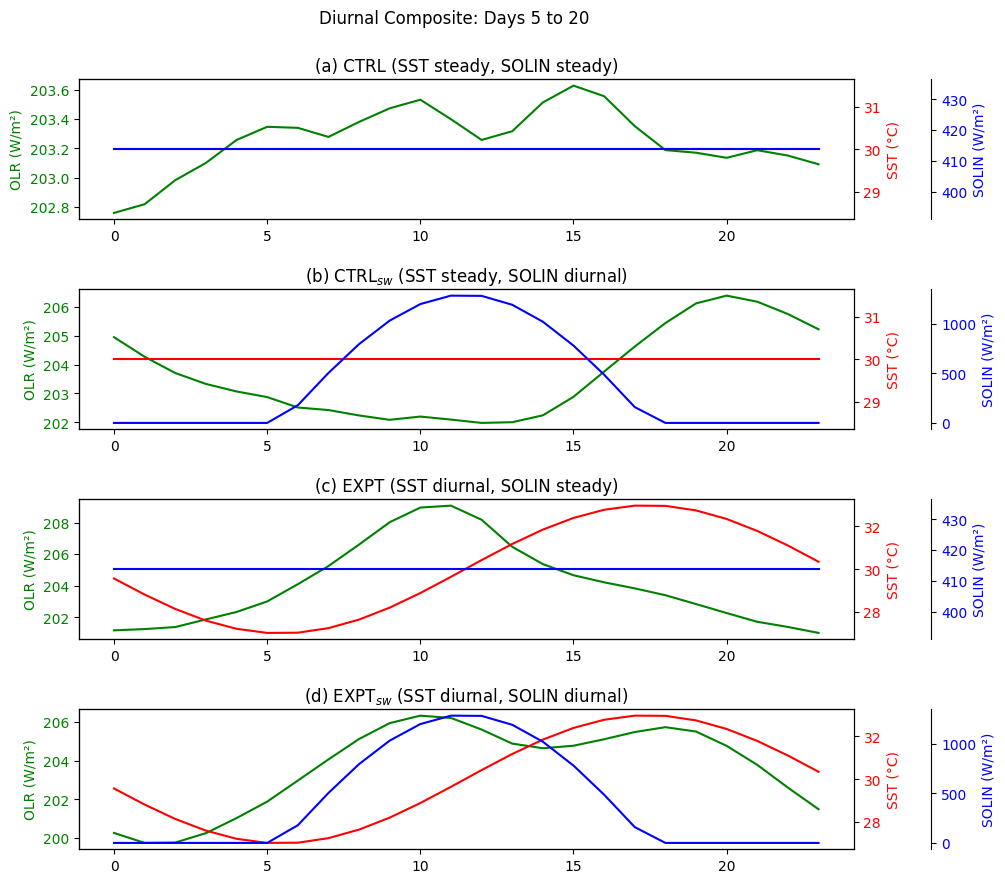

In [4]:
# Create diurnal time axis
time_diurnal = np.arange(0, 24, 24/np.shape(OLR_composites)[1])
# time_diurnal_adjust = np.arange(0, 24, 24/np.shape(QRAD_composites)[1])

# Plot results
fig, axes = plt.subplots(4, 1, figsize=(10, 10), gridspec_kw={'hspace': 0.5})
fig.suptitle(f'Diurnal Composite: Days {day_start} to {day_end}', y=0.95)

titles = [
    "(a) CTRL (SST steady, SOLIN steady)",
    "(b) CTRL$_{sw}$ (SST steady, SOLIN diurnal)",
    "(c) EXPT (SST diurnal, SOLIN steady)",
    "(d) EXPT$_{sw}$ (SST diurnal, SOLIN diurnal)"
]

colors = ['green', 'red', 'blue', 'orange', 'black', 'purple']

for i, ax in enumerate(axes):
    ax.plot(time_diurnal, OLR_composites[i], label='OLR', color=colors[0])
    ax.set_ylabel('OLR (W/m²)', color=colors[0])
    ax.tick_params(axis='y', labelcolor=colors[0])

    ax2 = ax.twinx()
    ax2.plot(time_diurnal, SST_composites[i], label='SST', color=colors[1])
    ax2.set_ylabel('SST (°C)', color=colors[1])
    ax2.tick_params(axis='y', labelcolor=colors[1])

    ax3 = ax.twinx()
    ax3.spines.right.set_position(("axes", 1.1))
    ax3.plot(time_diurnal, SOLIN_composites[i], label='SOLIN', color=colors[2])
    ax3.set_ylabel('SOLIN (W/m²)', color=colors[2])
    ax3.tick_params(axis='y', labelcolor=colors[2])

#     ax4 = ax.twinx()
#     ax4.spines.right.set_position(("axes", 1.2))
#     ax4.plot(time_diurnal, LHF_composites[i], label='LHFLX', color=colors[3])
#     ax4.set_ylabel('LHFLX (W/m²)', color=colors[3])
#     ax4.tick_params(axis='y', labelcolor=colors[3])

#     ax5 = ax.twinx()
#     ax5.spines.right.set_position(("axes", 1.3))
#     ax5.plot(time_diurnal, SHF_composites[i], label='SHFLX', color=colors[4])
#     ax5.set_ylabel('SHFLX (W/m²)', color=colors[4])
#     ax5.tick_params(axis='y', labelcolor=colors[4])
    
#     ax6 = ax.twinx()
#     ax6.spines.right.set_position(("axes", 1.4))
#     ax6.plot(time_diurnal_adjust, QRAD_composites[i], label='QRAD', color=colors[5])
#     ax6.set_ylabel('QRAD (W/m²)', color=colors[5])
#     ax6.tick_params(axis='y', labelcolor=colors[5])

    ax.set_title(titles[i])

plt.xlabel('Local Time (hour)')
plt.show()


In [5]:
# #Saving figure
# fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
# figname="Figure_8b_R1"

# plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
# !rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg

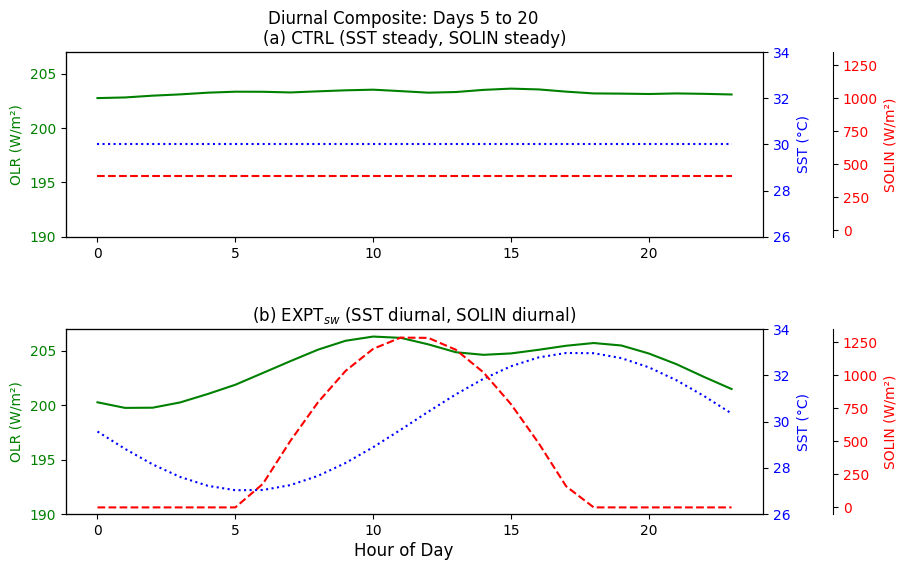

In [25]:
# Create diurnal time axis
time_diurnal = np.arange(0, 24, 24/np.shape(OLR_composites)[1])

# Plot results
fig, axes = plt.subplots(2, 1, figsize=(9, 6), gridspec_kw={'hspace': 0.5})
fig.suptitle(f'Diurnal Composite: Days {day_start} to {day_end}', y=0.95)

# Titles for selected panels
titles = [
    "(a) CTRL (SST steady, SOLIN steady)",
    "(b) EXPT$_{sw}$ (SST diurnal, SOLIN diurnal)"
]

colors = ['green', 'blue', 'red']

# Indices for panels (a) and (d)
selected_indices = [0, 3]

for idx, ax in enumerate(axes):
    i = selected_indices[idx]
    ax.plot(time_diurnal, OLR_composites[i], label='OLR', color=colors[0])
    ax.set_ylabel('OLR (W/m²)', color=colors[0])
    ax.tick_params(axis='y', labelcolor=colors[0])
    ax.set_ylim(190,207)

    ax2 = ax.twinx()
    ax2.plot(time_diurnal, SST_composites[i], label='SST', color=colors[1],linestyle='dotted')
    ax2.set_ylabel('SST (°C)', color=colors[1])
    ax2.set_ylim(26,34)
    ax2.tick_params(axis='y', labelcolor=colors[1])

    ax3 = ax.twinx()
    ax3.spines.right.set_position(("axes", 1.1))
    ax3.plot(time_diurnal, SOLIN_composites[i], label='SOLIN', color=colors[2],linestyle='dashed')
    ax3.set_ylabel('SOLIN (W/m²)', color=colors[2])
    ax3.tick_params(axis='y', labelcolor=colors[2])
    ax3.set_ylim(-50,1350)

    ax.set_title(titles[idx])

# plt.xlabel('Local Time (hour)')
fig.text(0.5, 0.04, 'Hour of Day', ha='center', fontsize=12)

#Saving figure
fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
figname="Figure_4_R1"

plt.savefig(f'{fig_directory}/{figname}.svg', format="svg", transparent=True, dpi=1200, bbox_inches='tight')
!rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg

plt.show()
